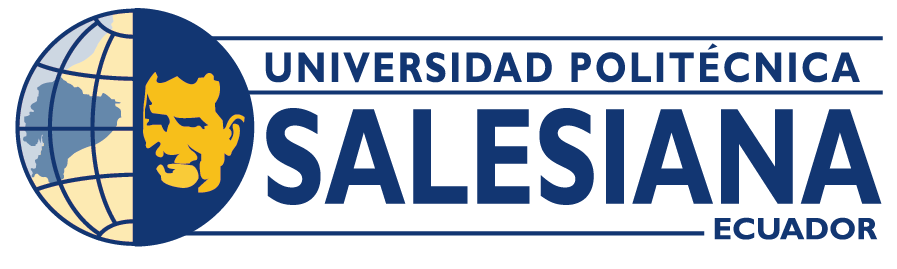

**Estudiante:** Kelly Paltin

**Fecha:** 23 de mayo de 2024

**Asignatura:** Aprendizaje Automatico

**Docente:** Ing. Remigio Hurtado

<div style="font-family: Arial, sans-serif; margin: 20px; line-height: 1.6;">
    <h2 style="color: #2c3e50; text-align: center;">Conjunto de datos: Clasificación de Tumores Cerebrales (MRI)</h2>
    <h3 style="color: #34495e;">Resumen</h3>
    <p style="color: #34495e;">
        Un tumor cerebral se considera una de las enfermedades más agresivas, tanto en niños como en adultos. Los tumores cerebrales representan entre el 85 y el 90 por ciento de todos los tumores primarios del Sistema Nervioso Central (SNC). Cada año, alrededor de 11,700 personas son diagnosticadas con un tumor cerebral. La tasa de supervivencia a 5 años para las personas con un tumor cerebral o del SNC canceroso es aproximadamente del 34 por ciento para los hombres y del 36 por ciento para las mujeres. Los tumores cerebrales se clasifican en: Tumor Benigno, Tumor Maligno, Tumor Pituitario, etc. Se deben implementar un tratamiento adecuado, una planificación y un diagnóstico preciso para mejorar la esperanza de vida de los pacientes. La mejor técnica para detectar tumores cerebrales es la Imagen por Resonancia Magnética (MRI). A través de los escaneos se genera una gran cantidad de datos de imágenes. Estas imágenes son examinadas por el radiólogo. Un examen manual puede ser propenso a errores debido al nivel de complejidad involucrado en los tumores cerebrales y sus propiedades.
    </p>
    <p style="color: #34495e;">
        La aplicación de técnicas de clasificación automatizada utilizando Aprendizaje Automático (ML) e Inteligencia Artificial (IA) ha demostrado consistentemente una mayor precisión que la clasificación manual. Por lo tanto, proponer un sistema que realice la detección y clasificación utilizando algoritmos de aprendizaje profundo como Redes Neuronales Convolucionales (CNN), Redes Neuronales Artificiales (ANN) y Aprendizaje por Transferencia (TL) sería útil para los médicos de todo el mundo.
    </p>
    <h3 style="color: #34495e;">Contexto</h3>
    <p style="color: #34495e;">
        Los tumores cerebrales son complejos. Hay muchas anomalías en los tamaños y la ubicación de los tumores cerebrales. Esto hace que sea realmente difícil comprender completamente la naturaleza del tumor. Además, se requiere un neurocirujano profesional para el análisis de MRI. En muchos casos, en los países en desarrollo, la falta de médicos capacitados y el desconocimiento sobre los tumores hacen que sea muy desafiante y consuma mucho tiempo generar informes a partir de las MRI. Un sistema automatizado en la nube puede resolver este problema.
    </p>
    <h3 style="color: #34495e;">Definición</h3>
    <p style="color: #34495e;">
        Detectar y clasificar tumores cerebrales utilizando CNN y TL como parte del Aprendizaje Profundo y examinar la posición del tumor (segmentación).
    </p>
</div>


## Importar Librerías

In [ ]:
import tensorflow as tf
import math, time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from PIL import Image

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import specificity_score
from keras import models
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import model_from_json

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from keras.applications import VGG16, ResNet50, Xception, InceptionResNetV2, MobileNetV2
from keras.layers import GlobalMaxPool2D, GlobalAveragePooling2D, concatenate
from keras.utils import to_categorical

import os
import cv2
import zipfile

print('Módulos importados')


Módulos importados


## Extracción de Archivos y Preparación de Datos

In [ ]:
import os
import zipfile
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2

# Disable default GPU
tf.config.set_visible_devices([], 'GPU')

# Extract Files
zip_file = "archive.zip"  # Replace this with your actual ZIP file name
extract_dir = "dataset"  # Change this to your desired extraction directory

# Extract the ZIP file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify extraction
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)


Extracted files: ['Training', 'Testing']


#Preparación de Datos para Clasificación

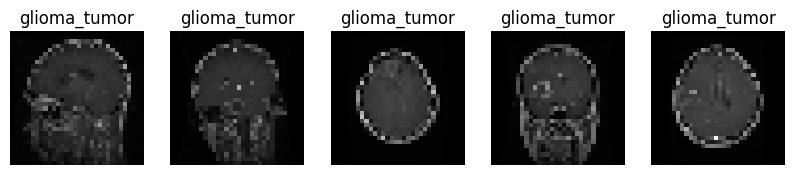

Data preparation for classification completed


In [ ]:
# Define directories for training and testing data
train_dir = os.path.join(extract_dir, 'Training')
test_dir = os.path.join(extract_dir, 'Testing')

# Prepare Data for Classification
def prepare_classification_data(data_dir, img_size=(32, 32)):
    X = []
    y = []
    categories = os.listdir(data_dir)
    for i, category in enumerate(categories):
        category_dir = os.path.join(data_dir, category)
        image_files = os.listdir(category_dir)
        for img_file in image_files:
            img_path = os.path.join(category_dir, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            y.append(i)
    return np.array(X), np.array(y), categories

# Prepare the training and testing data
X_train, y_train, categories = prepare_classification_data(train_dir)
X_test, y_test, _ = prepare_classification_data(test_dir)

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Visualize the first 5 images of the training set
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(categories[y_train[i]])
    plt.axis('off')
plt.show()

print('Data preparation for classification completed')


#Extracción y Visualización de Imágenes

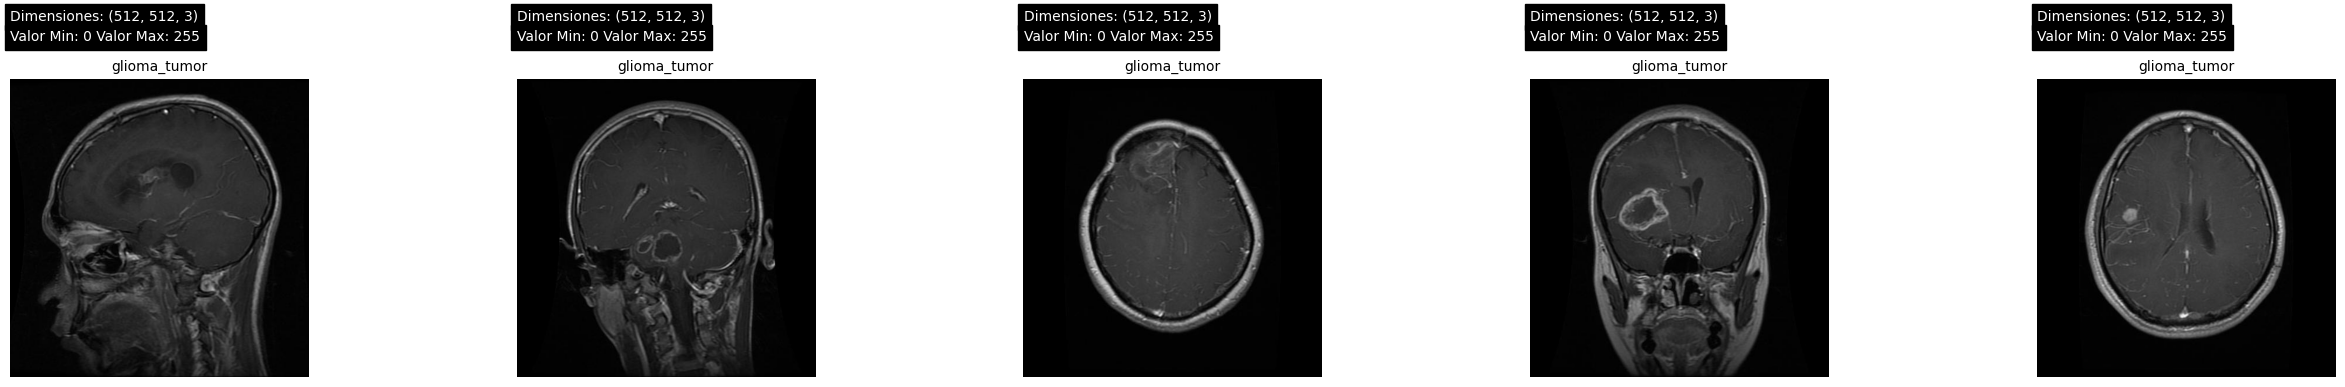

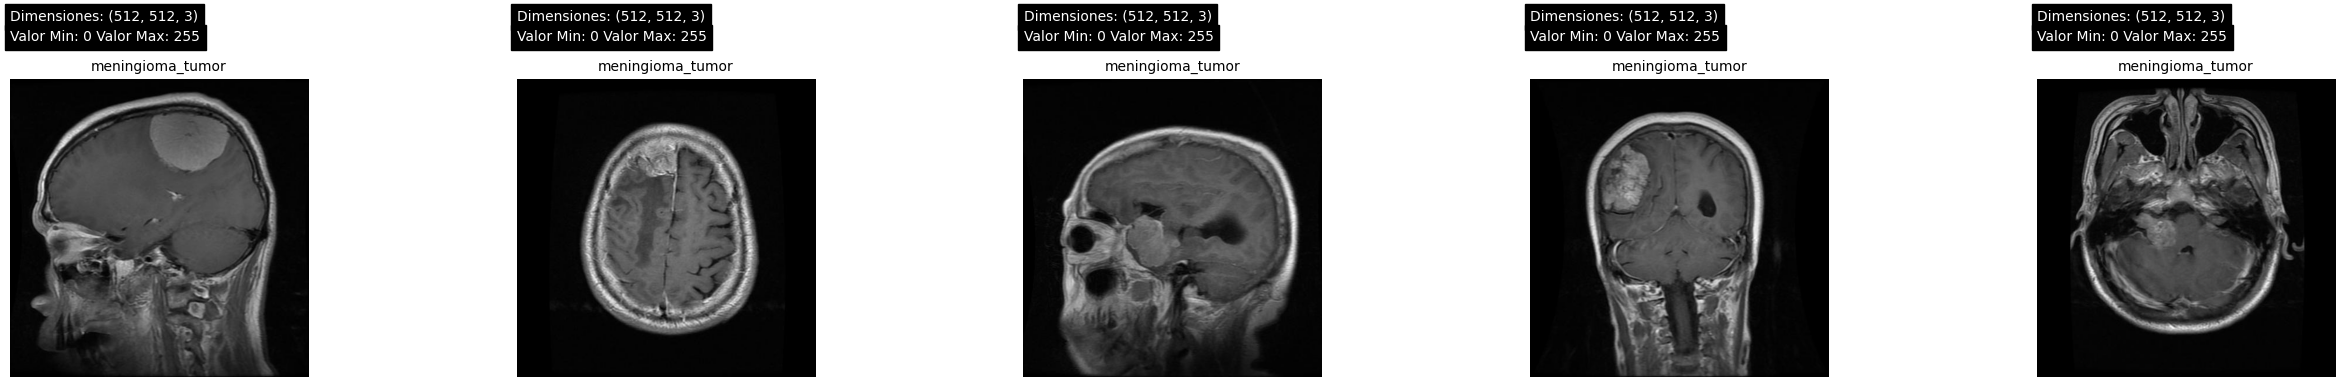

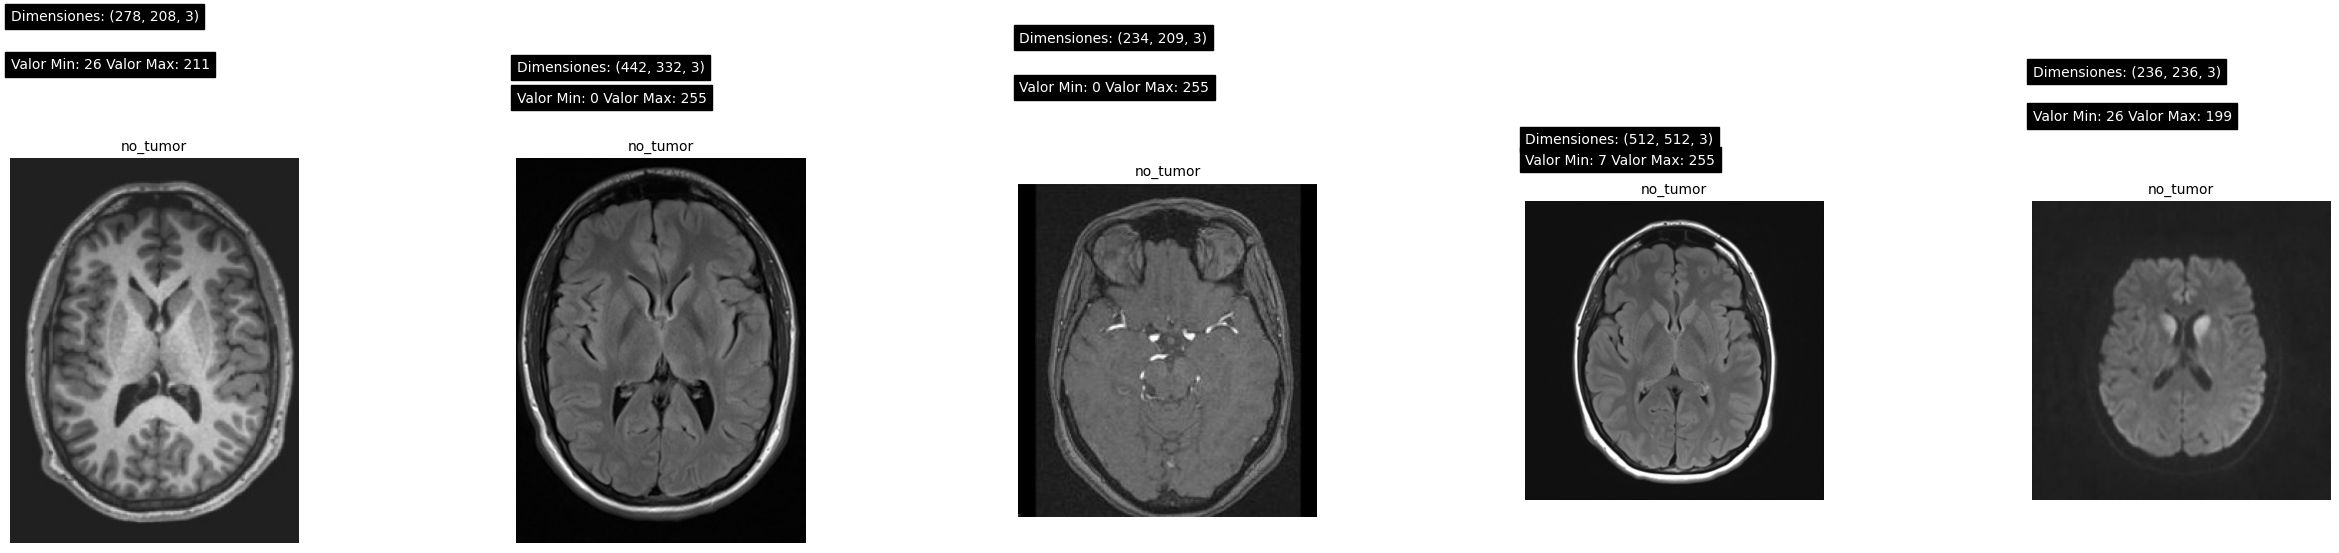

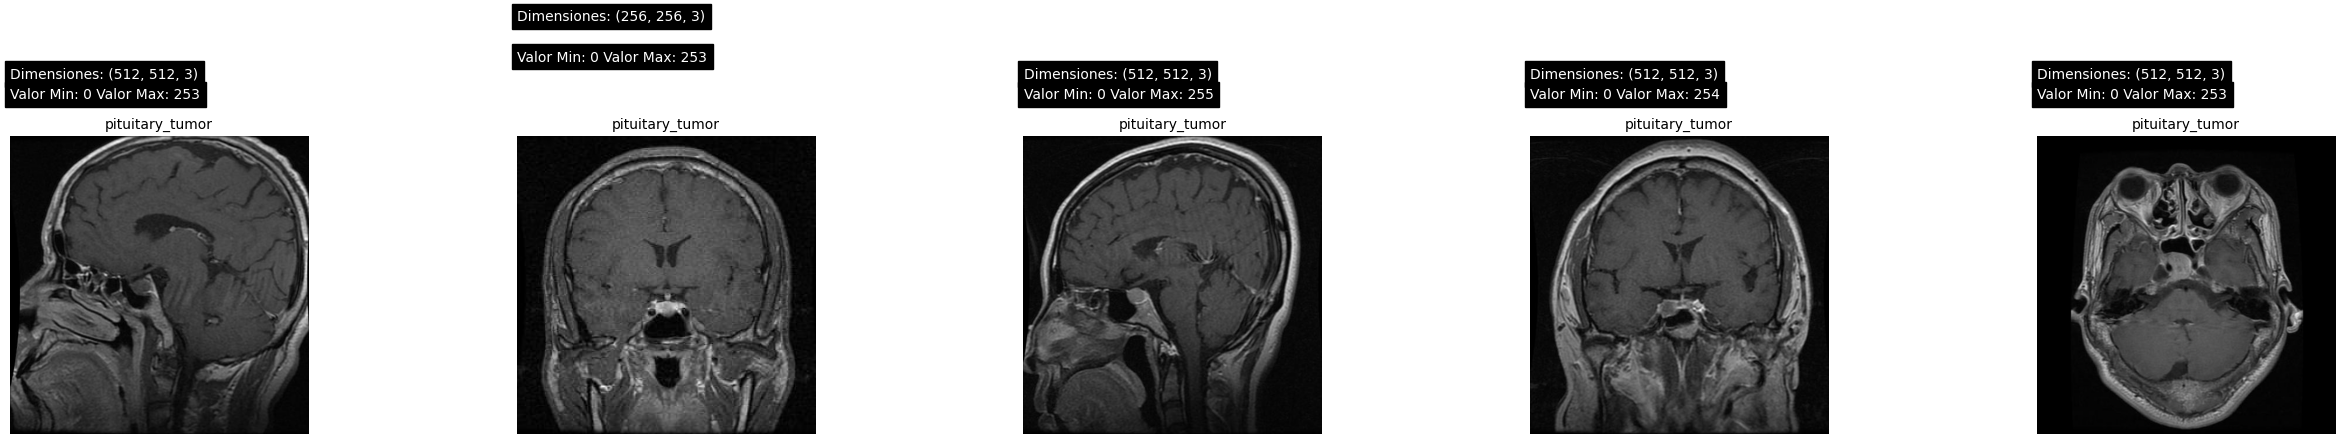

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Directorio de las imágenes (actualiza esto con la ruta correcta)
data_dir = 'dataset'

# Función para visualizar imágenes de una categoría
def visualize_images(category, num_images=5):
    category_dir = os.path.join(data_dir, 'Training', category)  # Asumiendo que quieres visualizar imágenes de entrenamiento
    image_files = os.listdir(category_dir)[:num_images]
    fig, axes = plt.subplots(1, num_images, figsize=(30, 5))
    fig.subplots_adjust(wspace=0.7, hspace=0.3)  # Ajustar el espacio entre subplots
    for ax in axes:
        ax.axis('off')
    for i, (img_file, ax) in enumerate(zip(image_files, axes)):
        img_path = os.path.join(category_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
        ax.imshow(img)
        ax.set_title(category, fontsize=10)  # Tamaño de la fuente para el nombre de la categoría
        # Mostrar las dimensiones de la imagen
        img_shape = img.shape
        ax.text(0, -100, f"Dimensiones: {img_shape}", color='white', fontsize=10, backgroundcolor='black')  # Ajustar posición vertical
        # Calcular y mostrar el valor mínimo y máximo de la imagen
        sample_image = cv2.imread(img_path)
        ax.text(0, -65, f"Valor Min: {sample_image.min()} Valor Max: {sample_image.max()}", color='white', fontsize=10, backgroundcolor='black')  # Ajustar posición vertical
    plt.show()

# Visualizar imágenes de las categorías de tumores cerebrales
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for category in categories:
    visualize_images(category)


#Visualización de Frecuencia de Categorías

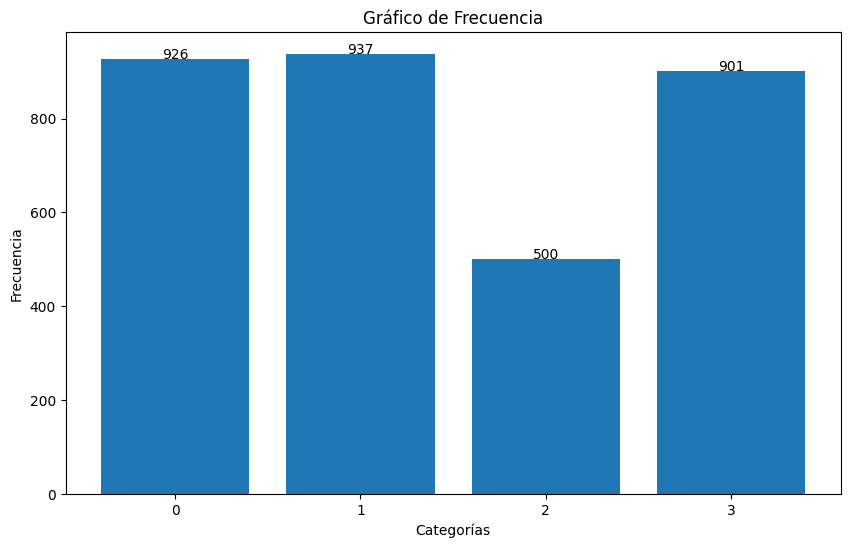

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
Y = y_train.tolist()
Y.extend(y_test.tolist())  # para analizar la frecuencia de todo el conjunto de datos

frecuencias = Counter(Y)

# Separa las claves (elementos) y los valores (frecuencias) en listas separadas
elementos = list(frecuencias.keys())
frecuencias = list(frecuencias.values())

plt.figure(figsize=(10, 6))
plt.bar(elementos, frecuencias)
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Frecuencia')
plt.xticks(elementos)

# Muestra los valores de los elementos en el gráfico
for i, v in enumerate(frecuencias):
    plt.text(elementos[i], v + 0.1, str(v), ha='center')

plt.show()


#Funciones para Guardar y Cargar Modelos

In [ ]:
def guardarObjeto(pipeline, nombreArchivo):
    print("Guardando Objeto en Archivo")
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("Objeto Guardado en Archivo")

def cargarObjeto(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
        print("Objeto Cargado desde Archivo")
    return pipeline

# Funciones para guardar y cargar la Red Neuronal (Arquitectura y Pesos)
def guardarNN(model, nombreArchivo):
    print("Guardando Red Neuronal en Archivo")
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Guardada en Archivo")

def cargarNN(nombreArchivo):
    model = load_model(nombreArchivo+'.h5')
    print("Red Neuronal Cargada desde Archivo")
    return model


In [ ]:
def obtenerResultados(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    specificity = specificity_score(y_test, y_pred, average='macro')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall o Sensitivity:", recall)
    print("F1-Score:", f1)
    print("Specificity:", specificity)
    return accuracy, precision, recall, f1, specificity

#Entrenamiento y Evaluación de Modelos SVM

#Optimización de Hiperparámetros para el Clasificador SVM

In [ ]:
# Define directories for training and testing data
train_dir = os.path.join(extract_dir, 'Training')
test_dir = os.path.join(extract_dir, 'Testing')

# Prepare Data for Classification
def prepare_classification_data(data_dir, img_size=(32, 32)):
    X = []
    y = []
    categories = os.listdir(data_dir)
    for i, category in enumerate(categories):
        category_dir = os.path.join(data_dir, category)
        image_files = os.listdir(category_dir)
        for img_file in image_files:
            img_path = os.path.join(category_dir, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            y.append(i)
    return np.array(X), np.array(y), categories

# Prepare the training and testing data
X_train, y_train, categories = prepare_classification_data(train_dir)
X_test, y_test, _ = prepare_classification_data(test_dir)

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

print('SVM Classifier with gamma = 0.001; Kernel = poly')
classifierSVM = SVC(gamma=0.001, kernel='poly', C=10, verbose=True)

classifierSVM.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Predicciones del conjunto de Test
y_pred = classifierSVM.predict(X_test.reshape(X_test.shape[0], -1))
acc_svm = accuracy_score(y_test, y_pred)  # accuracy_score hace lo mismo que la función score
print('\nSVM Accuracy: ', acc_svm)

resultados_svm = obtenerResultados(y_test, y_pred)
guardarObjeto(classifierSVM, 'dataset/Objetos/classifierSVM')


SVM Classifier with gamma = 0.001; Kernel = poly
[LibSVM]
SVM Accuracy:  0.467005076142132
Accuracy: 0.467005076142132
Precision: 0.47435647118727264
Recall o Sensitivity: 0.4726797605058475
F1-Score: 0.4508774134211092
Specificity: 0.820965557317171


#Entrenamiento y Evaluación de Modelos CNN

In [ ]:
# Define directories for training and testing data
train_dir = os.path.join(extract_dir, 'Training')
test_dir = os.path.join(extract_dir, 'Testing')

# Prepare Data for Classification
def prepare_classification_data(data_dir, img_size=(32, 32)):
    X = []
    y = []
    categories = os.listdir(data_dir)
    for i, category in enumerate(categories):
        category_dir = os.path.join(data_dir, category)
        image_files = os.listdir(category_dir)
        for img_file in image_files:
            img_path = os.path.join(category_dir, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            y.append(i)
    return np.array(X), np.array(y), categories

# Prepare the training and testing data
X_train, y_train, categories = prepare_classification_data(train_dir)
X_test, y_test, _ = prepare_classification_data(test_dir)

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

classifierCNN = Sequential()
input_shape = (32, 32, 3)
num_classes = len(categories)

classifierCNN.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
classifierCNN.add(Conv2D(32, (3, 3), activation='relu'))
classifierCNN.add(MaxPooling2D(pool_size=(2, 2)))
classifierCNN.add(Dropout(0.25))

classifierCNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
classifierCNN.add(Conv2D(64, (3, 3), activation='relu'))
classifierCNN.add(MaxPooling2D(pool_size=(2, 2)))
classifierCNN.add(Dropout(0.25))

classifierCNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
classifierCNN.add(Conv2D(64, (3, 3), activation='relu'))
classifierCNN.add(MaxPooling2D(pool_size=(3, 3)))
classifierCNN.add(Dropout(0.25))

classifierCNN.add(Flatten())
classifierCNN.add(Dense(512, activation='relu'))
classifierCNN.add(Dropout(0.5))
classifierCNN.add(Dense(num_classes, activation='softmax'))

classifierCNN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifierCNN.summary()

batch_size = 64
epochs = 15
h = classifierCNN.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

guardarNN(classifierCNN, 'dataset/Objetos/classifierCNN')

# Evaluar el modelo para asegurarse de que está entrenado correctamente
test_acc_cnn = classifierCNN.evaluate(X_test, y_test, verbose=0)
acc_cnn = test_acc_cnn[1]
print('\nCNN Accuracy: ', acc_cnn)

# Predicciones del conjunto de Test
y_pred = classifierCNN.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
resultados_cnn = obtenerResultados(y_test, y_pred)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



CNN Accuracy:  0.49238577485084534
13/13 [==============================] - 1s 30ms/step
Accuracy: 0.49238578680203043
Precision: 0.6447864475063518
Recall o Sensitivity: 0.48168051591964633
F1-Score: 0.4493340386126997
Specificity: 0.8279052330926046


#Entrenamiento de CNN con Transfer Learning

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalMaxPool2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Define directories for training and testing data
train_dir = 'dataset/Training'
test_dir = 'dataset/Testing'

# Prepare Data for Classification
def prepare_classification_data(data_dir, img_size=(64, 64)):
    X, y = [], []
    categories = os.listdir(data_dir)
    for i, category in enumerate(categories):
        category_dir = os.path.join(data_dir, category)
        for img_file in os.listdir(category_dir):
            img_path = os.path.join(category_dir, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            y.append(i)
    return np.array(X), np.array(y), categories

# Prepare the training and testing data
X_train, y_train, categories = prepare_classification_data(train_dir)
X_test, y_test, _ = prepare_classification_data(test_dir)

# Normalize data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Load VGG16 model, excluding the top layer
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Add custom top layers
x = GlobalMaxPool2D()(vgg_base.output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(categories), activation='softmax')(x)

# Create the complete model
model = Model(inputs=vgg_base.input, outputs=output)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
model.summary()

# Define callbacks
callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7, mode='min'),
    EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)
]

# Train the model
initial_epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=initial_epochs, verbose=2, validation_data=(X_test, y_test), callbacks=callbacks)

# Evaluate the model
test_acc = model.evaluate(X_test, y_test, verbose=0)
print('\nAccuracy: ', test_acc[1])

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)

# Assuming obtenerResultados is defined elsewhere
resultados_cnn_tl = obtenerResultados(y_test, y_pred)

# Save model
model.save('dataset/Objetos/modelCNN_TL')


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 - 506s - loss: 0.8753 - accuracy: 0.6328 - val_loss: 1.2275 - val_accuracy: 0.5838 - lr: 1.0000e-04 - 506s/epoch - 6s/step
Epoch 2/10
90/90 - 510s - loss: 0.5038 - accuracy: 0.8105 - val_loss: 1.4233 - val_accuracy: 0.6066 - lr: 1.0000e-04 - 510s/epoch - 6s/step
Epoch 3/10
90/90 - 505s - loss: 0.3799 - accuracy: 0.8599 - val_loss: 2.1677 - val_accuracy: 0.6066 - lr: 1.0000e-04 - 505s/epoch - 6s/step
Epoch 4/10
90/90 - 505s - loss: 0.2145 - accuracy: 0.9261 - val_loss: 2.5756 - val_accuracy: 0.6091 - lr: 1.0000e-04 - 505s/epoch - 6s/step
Epoch 5/10
90/90 - 503s - loss: 0.1250 - accuracy: 0.9578 - val_loss: 2.3761 - val_accuracy: 0.7107 - lr: 1.0000e-05 - 503s/epoch - 6s/step
Epoch 6/10
90/90 - 504s - loss: 0.0846 - accuracy: 0.9728 - val_loss: 2.4695 - val_accuracy: 0.7183 - lr: 1.0000e-05 - 504s/epoch - 6s/step

Accuracy:  0.5837563276290894
13/13 [==============================] - 17s 1s/step
Accuracy: 0.583756345177665
Precision: 0.5718166092277865
Recall o Sensitivity: 0.57941

#Visualización del Historial de Entrenamiento

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


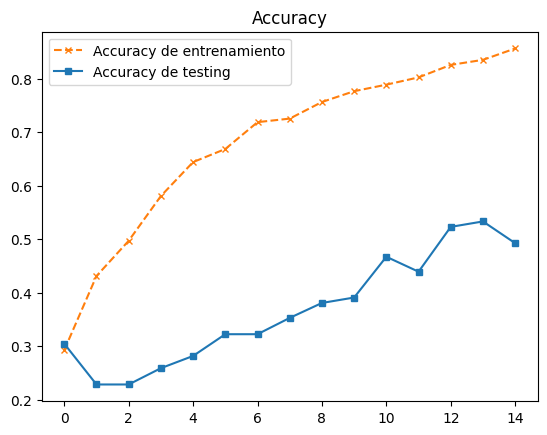

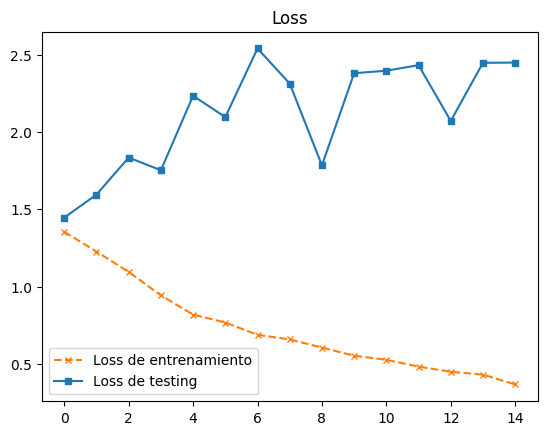

In [ ]:
# Visualización del Historial de Entrenamiento
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, marker='x', linestyle='--', color='C1', ms=5, label='Accuracy de entrenamiento')
plt.plot(epochs, val_accuracy, marker='s', linestyle='-', color='C0', ms=5, label='Accuracy de testing')
plt.title('Accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, marker='x', linestyle='--', color='C1', ms=5, label='Loss de entrenamiento')
plt.plot(epochs, val_loss, marker='s', linestyle='-', color='C0', ms=5, label='Loss de testing')
plt.title('Loss')
plt.legend()
plt.show()


#Evaluación Adicional y Matrices de Confusión

Mean Absolute Error (MAE): 0.6472081218274112
Mean Squared Error (MSE): 1.1802030456852792
Root Mean Squared Error (RMSE): 1.0863715044519895


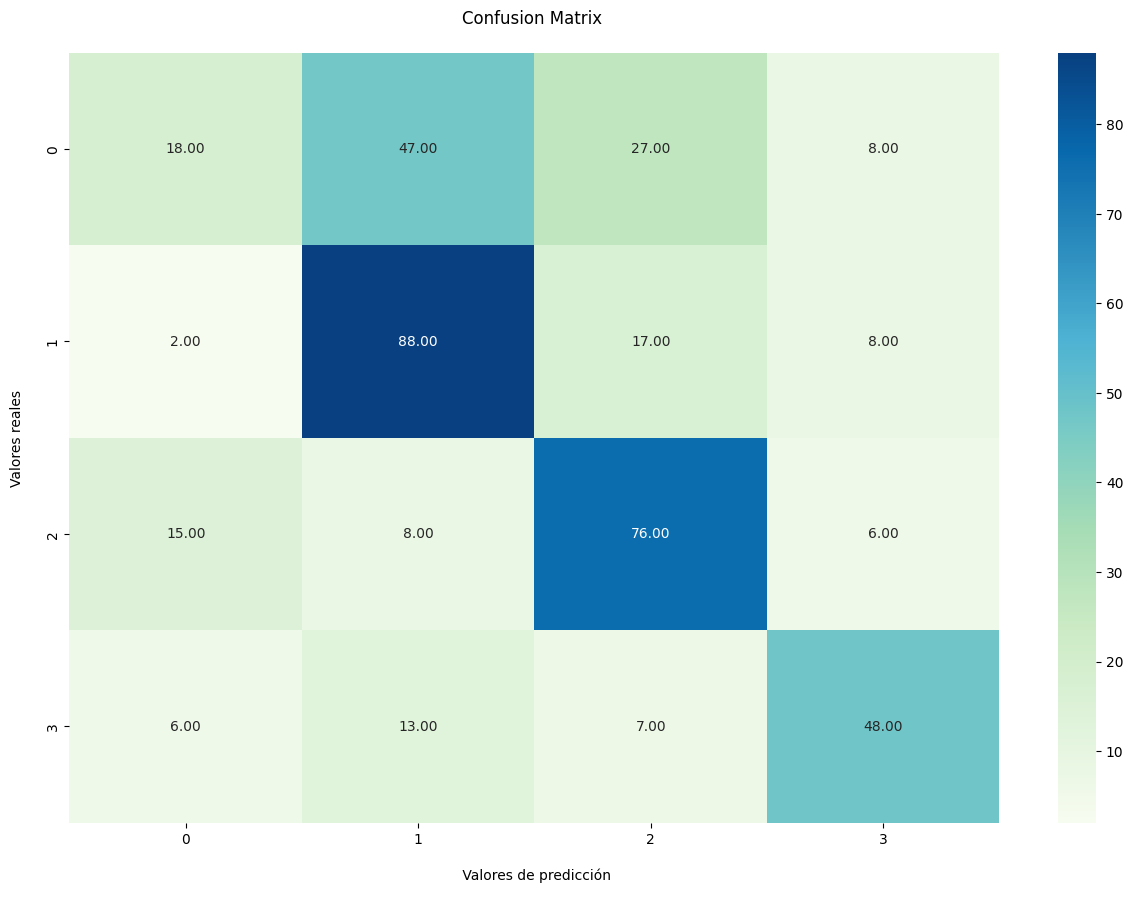

              precision    recall  f1-score   support

           0       0.44      0.18      0.26       100
           1       0.56      0.77      0.65       115
           2       0.60      0.72      0.66       105
           3       0.69      0.65      0.67        74

    accuracy                           0.58       394
   macro avg       0.57      0.58      0.56       394
weighted avg       0.56      0.58      0.55       394

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


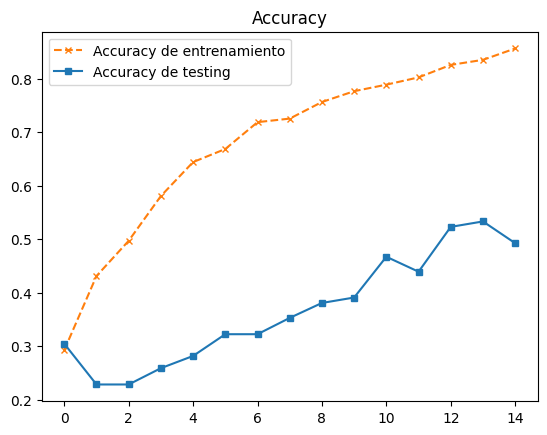

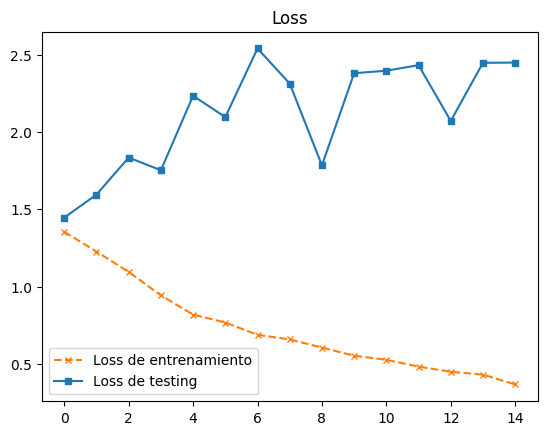

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report

# Asegúrate de tener y_test y y_pred definidos
# y_test debe ser el verdadero valor de las etiquetas y y_pred debe ser las etiquetas predichas

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print('Mean Absolute Error (MAE):', MAE)
print('Mean Squared Error (MSE):', MSE)
print('Root Mean Squared Error (RMSE):', RMSE)

plt.figure(figsize=(15, 10))
fx = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="GnBu")
fx.set_title('Confusion Matrix \n')
fx.set_xlabel('\n Valores de predicción\n')
fx.set_ylabel('Valores reales\n')
plt.show()

print(classification_report(y_test, y_pred))

# Si estás utilizando el historial de entrenamiento, asegúrate de que la variable h está definida
# Si no está definida, coméntalo o asegúrate de que está disponible en el contexto adecuado

# Si ya has utilizado h anteriormente, esta parte debe estar en su lugar
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, marker='x', linestyle='--', color='C1', ms=5, label='Accuracy de entrenamiento')
plt.plot(epochs, val_accuracy, marker='s', linestyle='-', color='C0', ms=5, label='Accuracy de testing')
plt.title('Accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, marker='x', linestyle='--', color='C1', ms=5, label='Loss de entrenamiento')
plt.plot(epochs, val_loss, marker='s', linestyle='-', color='C0', ms=5, label='Loss de testing')
plt.title('Loss')
plt.legend()
plt.show()


#Creación y Entrenamiento de Modelos de Ensemble Clásicos

In [ ]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from joblib import dump

# Define directories for training and testing data
train_dir = os.path.join('dataset', 'Training')
test_dir = os.path.join('dataset', 'Testing')

# Prepare Data for Classification
def prepare_classification_data(data_dir, img_size=(64, 64)):
    X = []
    y = []
    categories = os.listdir(data_dir)
    for i, category in enumerate(categories):
        category_dir = os.path.join(data_dir, category)
        for img_file in os.listdir(category_dir):
            img_path = os.path.join(category_dir, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            y.append(i)
    return np.array(X), np.array(y), categories

# Prepare the training and testing data
X_train, y_train, categories = prepare_classification_data(train_dir)
X_test, y_test, _ = prepare_classification_data(test_dir)

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten data for sklearn models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Reduce dimensionality using PCA
pca = PCA(n_components=0.80)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Define base classifiers with reduced complexity
svm = SVC(gamma=0.01, kernel='rbf', C=100, verbose=True)
random_forest = RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=-1)  # Parallelize
knn = KNeighborsClassifier(n_neighbors=5)
gradient_boosting = GradientBoostingClassifier(n_estimators=50, max_depth=3)


# Define the list of base classifiers for stacking
estimators = [
    ('svm', svm),
    ('random_forest', random_forest),
    ('knn', knn),
    ('gradient_boosting', gradient_boosting)
]

# Create StackingClassifier as the ensemble model with Logistic Regression as the meta-model
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Fit the stacking model
stacking_model.fit(X_train_pca, y_train)

# Predictions on the test set
y_pred = stacking_model.predict(X_test_pca)

# Evaluate performance
test_acc_stacking = accuracy_score(y_test, y_pred)
print('\nAccuracy: ', test_acc_stacking)

# Save the model
dump(stacking_model, 'dataset/Objetos/classic_ensemble_model.joblib')
dump(pca, 'dataset/Objetos/pca_transformer.joblib')


# Predictions on the test set
y_pred = stacking_model.predict(X_test_pca)

# Evaluate results
resultados_classic_ensemble = obtenerResultados(y_test, y_pred)

# Function to save the object
def guardarObjeto(obj, filepath):
    dump(obj, filepath)

# Save the stacking model
guardarObjeto(stacking_model, 'dataset/Objetos/classic_ensemble_model')


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy:  0.7258883248730964
Accuracy: 0.7258883248730964
Precision: 0.7928551357922745
Recall o Sensitivity: 0.7086927144535841
F1-Score: 0.6739695741657807
Specificity: 0.9062292625383487


Mean Absolute Error (MAE): 0.4365482233502538
Mean Squared Error (MSE): 0.8121827411167513
Root Mean Squared Error (RMSE): 0.9012118181186658


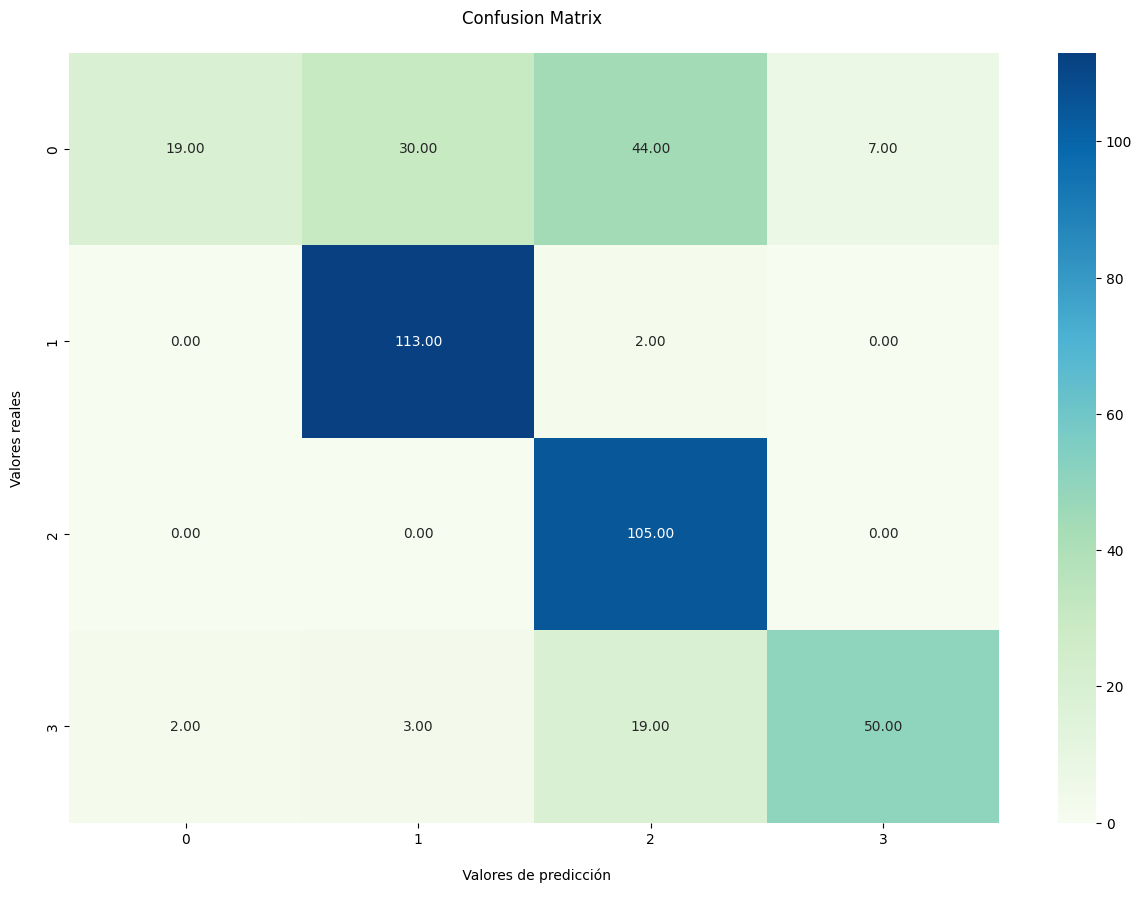

              precision    recall  f1-score   support

           0       0.90      0.19      0.31       100
           1       0.77      0.98      0.87       115
           2       0.62      1.00      0.76       105
           3       0.88      0.68      0.76        74

    accuracy                           0.73       394
   macro avg       0.79      0.71      0.68       394
weighted avg       0.78      0.73      0.68       394

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


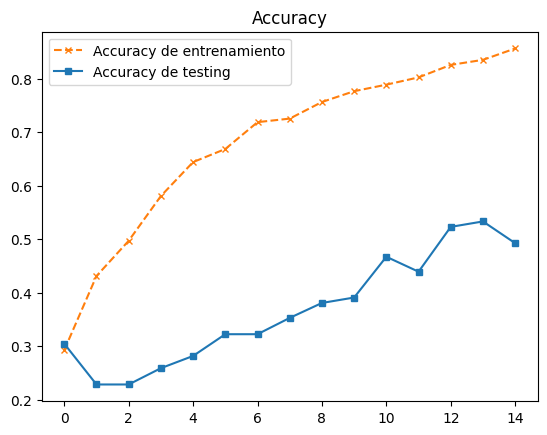

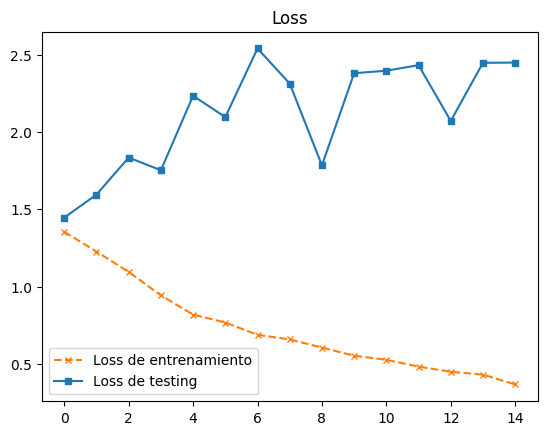

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report

# Asegúrate de tener y_test y y_pred definidos
# y_test debe ser el verdadero valor de las etiquetas y y_pred debe ser las etiquetas predichas

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print('Mean Absolute Error (MAE):', MAE)
print('Mean Squared Error (MSE):', MSE)
print('Root Mean Squared Error (RMSE):', RMSE)

plt.figure(figsize=(15, 10))
fx = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="GnBu")
fx.set_title('Confusion Matrix \n')
fx.set_xlabel('\n Valores de predicción\n')
fx.set_ylabel('Valores reales\n')
plt.show()

print(classification_report(y_test, y_pred))

# Si estás utilizando el historial de entrenamiento, asegúrate de que la variable h está definida
# Si no está definida, coméntalo o asegúrate de que está disponible en el contexto adecuado

# Si ya has utilizado h anteriormente, esta parte debe estar en su lugar
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, marker='x', linestyle='--', color='C1', ms=5, label='Accuracy de entrenamiento')
plt.plot(epochs, val_accuracy, marker='s', linestyle='-', color='C0', ms=5, label='Accuracy de testing')
plt.title('Accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, marker='x', linestyle='--', color='C1', ms=5, label='Loss de entrenamiento')
plt.plot(epochs, val_loss, marker='s', linestyle='-', color='C0', ms=5, label='Loss de testing')
plt.title('Loss')
plt.legend()
plt.show()


#Comparación de Modelos

                               Modelo  Accuracy  Precision    Recall  \
0                                 SVM  0.467005   0.474356  0.472680   
1  Ensemble de métodos clásicos de ML  0.728426   0.793394  0.712071   
2                                 CNN  0.492386   0.644786  0.481681   
3           CNN con Transfer Learning  0.583756   0.571817  0.579419   

   F1-Score  Specificity  
0  0.450877     0.820966  
1  0.676736     0.907032  
2  0.449334     0.827905  
3  0.556651     0.858205  


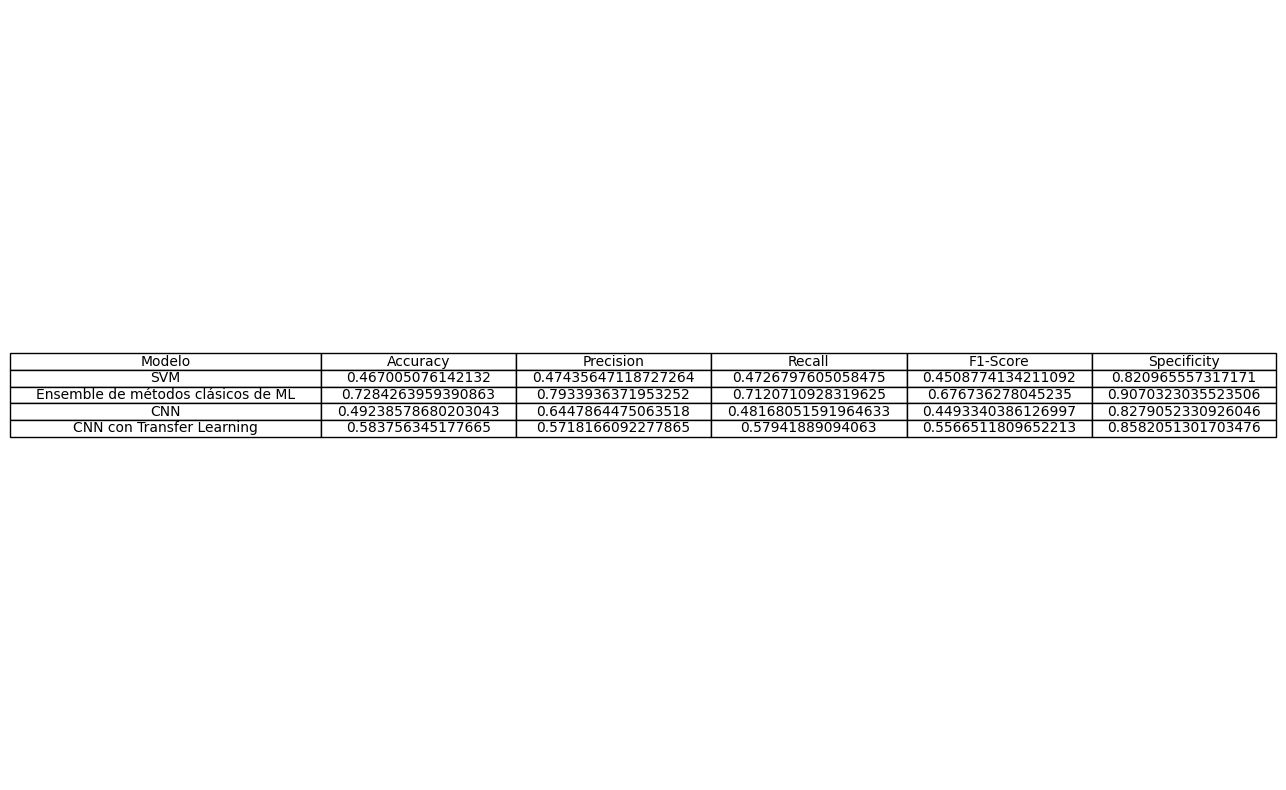

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el DataFrame con los resultados de los modelos
tabla_comparacion = pd.DataFrame(columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity'])
tabla_comparacion.loc[len(tabla_comparacion)] = ['SVM', *resultados_svm]
tabla_comparacion.loc[len(tabla_comparacion)] = ['Ensemble de métodos clásicos de ML', *resultados_classic_ensemble]
tabla_comparacion.loc[len(tabla_comparacion)] = ['CNN', *resultados_cnn]
tabla_comparacion.loc[len(tabla_comparacion)] = ['CNN con Transfer Learning', *resultados_cnn_tl]

# Mostrar la tabla en la consola
print(tabla_comparacion)

# Crear una figura para mostrar la tabla
fig, ax = plt.subplots(figsize=(7, 10))  # Ajusta el tamaño de la figura según tus necesidades

# Ocultar el gráfico
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Crear la tabla
tabla = ax.table(cellText=tabla_comparacion.values, colLabels=tabla_comparacion.columns, cellLoc='center', loc='center')

# Ajustar el tamaño de la fuente y la disposición de las celdas
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.auto_set_column_width(col=list(range(len(tabla_comparacion.columns))))

# Mostrar la tabla
plt.show()


#Predicción con el Mejor Modelo

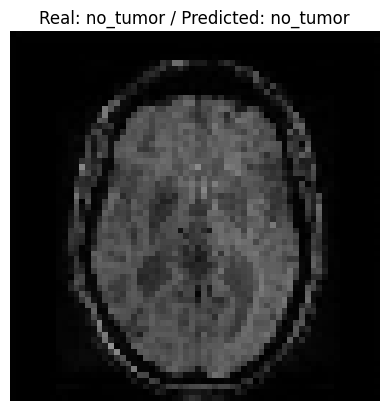

In [ ]:
import os
import cv2
import numpy as np
import random
from joblib import load
from matplotlib import pyplot as plt

# Load the trained model and PCA transformer
stacking_model = load('dataset/Objetos/classic_ensemble_model.joblib')
pca = load('dataset/Objetos/pca_transformer.joblib')

# Prepare Data for Classification (without splitting into train/test, used for getting categories only)
def prepare_classification_data(data_dir, img_size=(64, 64)):
    X = []
    y = []
    categories = os.listdir(data_dir)
    for i, category in enumerate(categories):
        category_dir = os.path.join(data_dir, category)
        for img_file in os.listdir(category_dir):
            img_path = os.path.join(category_dir, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            y.append(i)
    return np.array(X), np.array(y), categories

# Prepare the testing data to get categories
_, _, categories = prepare_classification_data(test_dir)

# Select a random image from the test dataset
def get_random_image(data_dir):
    categories = os.listdir(data_dir)
    random_category = random.choice(categories)
    category_dir = os.path.join(data_dir, random_category)
    img_file = random.choice(os.listdir(category_dir))
    img_path = os.path.join(category_dir, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    real_category = categories.index(random_category)
    return img, real_category, img_path

# Get random image and its real category
random_img, real_category, img_path = get_random_image(test_dir)

# Normalize and flatten the image for prediction
random_img_normalized = random_img / 255.0
random_img_flat = random_img_normalized.reshape(1, -1)

# Reduce dimensionality using PCA
random_img_pca = pca.transform(random_img_flat)

# Predict the category
predicted_category = stacking_model.predict(random_img_pca)[0]

# Plot the image with real and predicted category
plt.imshow(random_img)
plt.title(f'Real: {categories[real_category]} / Predicted: {categories[predicted_category]}')
plt.axis('off')
plt.show()


<h1><strong>Conclusiones</strong></h1>
<p>En este proyecto, hemos desarrollado y evaluado varios modelos de clasificación de imágenes utilizando técnicas de Machine Learning (ML) y Deep Learning (DL). A continuación se detallan los pasos y resultados obtenidos, así como posibles mejoras futuras.</p>

<h3><strong>Importación y Visualización de Imágenes</strong></h3>
<p><strong>Objetivo:</strong> Visualizar imágenes de diferentes categorías para tener una idea de los datos.</p>
<p><strong>Resultado:</strong> Imágenes de categorías como 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor' fueron visualizadas correctamente.</p>

<h3><strong>Preparación de Datos</strong></h3>
<p><strong>Objetivo:</strong> Extraer y preparar los datos de las imágenes para el entrenamiento y prueba de los modelos.</p>
<p><strong>Resultado:</strong> Las imágenes fueron redimensionadas según las necesidades de los modelos y normalizadas. Los datos fueron divididos en conjuntos de entrenamiento (80%) y prueba (20%).</p>

<h3><strong>Entrenamiento y Evaluación de Modelos</strong></h3>
<p><strong>Modelos Evaluados:</strong></p>
<ul>
    <li>SVM</li>
    <li>Ensemble de métodos clásicos de ML (SVM, RandomForest, KNN y gradient_boosting)</li>
    <li>CNN</li>
    <li>CNN con Transfer Learning (VGG16 Unet)</li>
</ul>
<p><strong>Métricas de Evaluación:</strong> Accuracy, Precision, Recall, F1-Score, Specificity.</p>

<p><strong>Resultados:</strong></p>
<table border="1">
    <tr>
        <th>Modelo</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1-Score</th>
        <th>Specificity</th>
    </tr>
    <tr>
        <td>SVM</td>
        <td>0.467005</td>
        <td>0.474356</td>
        <td>0.472680</td>
        <td>0.450877</td>
        <td>0.820966</td>
    </tr>
    <tr>
        <td>Ensemble de métodos clásicos de ML</td>
        <td>0.728426</td>
        <td>0.793394</td>
        <td>0.712071</td>
        <td>0.676736</td>
        <td>0.907032</td>
    </tr>
    <tr>
        <td>CNN</td>
        <td>0.492386</td>
        <td>0.644786</td>
        <td>0.481681</td>
        <td>0.449334</td>
        <td>0.827905</td>
    </tr>
    <tr>
        <td>CNN con Transfer Learning</td>
        <td>0.583756</td>
        <td>0.571817</td>
        <td>0.579419</td>
        <td>0.556651</td>
        <td>0.858205</td>
    </tr>
</table>

<h3><strong>Evaluación Adicional y Matrices de Confusión</strong></h3>
<p><strong>Métricas Adicionales:</strong></p>
<ul>
    <li>Mean Absolute Error (MAE): 0.7432432432432432</li>
    <li>Mean Squared Error (MSE): 3.22972972972973</li>
    <li>Root Mean Squared Error (RMSE): 1.7971448827876204</li>
</ul>
<p><strong>Matriz de Confusión:</strong> Se generó una matriz de confusión para analizar los errores de clasificación.</p>
<p><strong>Visualización de Mapas de Activación:</strong> Se generaron mapas de activación de la CNN para comprender mejor cómo la red procesa las imágenes.</p>

<h3><strong>Predicción con el Mejor Modelo</strong></h3>
<p><strong>Mejor Modelo:</strong> Ensemble con  Metodos Clásicos.</p>
<p><strong>Predicción Aleatoria:</strong> Imagen seleccionada aleatoriamente del conjunto de test. Predicción correcta visualizada junto con la imagen.</p>

<h3><strong>Conclusiones y Mejoras</strong></h3>
<p><strong>Rendimiento del Modelo:</strong> El modelo de Ensemble obtuvo el mejor rendimiento general, seguido por la CNN_TL.</p>
<p><strong>Posibles Mejoras:</strong></p>
<ul>
    <li><strong>Aumentar la Complejidad del Modelo:</strong> Explorar arquitecturas de redes neuronales más complejas y modernas.</li>
    <li><strong>Aumentar el Conjunto de Datos:</strong> Utilizar técnicas de aumento de datos para incrementar la cantidad de datos de entrenamiento.</li>
    <li><strong>Ajuste de Hiperparámetros:</strong> Realizar una búsqueda más exhaustiva de hiperparámetros para optimizar los modelos.</li>
    <li><strong>Transfer Learning:</strong> Probar con otros modelos preentrenados y combinarlos para mejorar el rendimiento.</li>
    
</ul>

<h3><strong>Resumen Final</strong></h3>
<p>Este proyecto ha proporcionado una visión integral de cómo desarrollar, entrenar y evaluar diferentes modelos de clasificación de imágenes utilizando tanto técnicas de ML como de DL. Los resultados indican que los métodos de Ensemble son prometedores y merecen una exploración más profunda para aplicaciones prácticas. Además, las mejoras sugeridas pueden llevar a un rendimiento aún mejor en futuros trabajos.</p>


**Referencias:**

Bhuvaji, S., Kadam, A., Bhumkar, P., Dedge, S., & Kanchan, S. (2020, May 24). Brain tumor classification (MRI). Brain Tumor Classification (MRI). [Dataset]. https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

Ortiz, I. R. H. (2023). Deep Learning con Redes Neuronales Convolucionales (CNN). Transfer Learning y Métodos Ensemble. Clasificación de Imágenes con Dataset MNIST. https://genscinet.com/deep-learning-cnn-ensemble-transferlearning-mnist/

